## Step 1: Import libraries and modules.

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib

## Step 2: Load red wine data.

In [82]:
df = pd.read_csv("desktop/winequality-red.csv", sep=";")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [84]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [85]:
# split our features and label.
X = df.drop("quality", axis=1)
y = df.quality

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


## Step 3: Split data into training and test sets.

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

## Step 4: Declare data preprocessing steps.

#### What is standardization?

Standardization is the process of subtracting the means from each feature and then dividing by the feature standard deviations.

Standardization is a common requirement for machine learning tasks. Many algorithms assume that all features are centered around zero and have approximately the same variance.

We will standardize our features because they were on different scales.

instead of directly invoking the scale function, we'll be using a feature in Scikit-Learn called the Transformer API. The Transformer API allows you to "fit" a preprocessing step using the training data the same way you'd fit a model and then use the same transformation on future data sets.

Here's what that process looks like:

* Fit the transformer on the training set (saving the means and standard deviations)
* Apply the transformer to the training set (scaling the training data)
* Apply the transformer to the test set (using the same means and standard deviations)

This makes your final estimate of model performance more realistic, and it allows to insert your preprocessing steps into a **cross-validation pipeline.**


In [87]:
# the scaler object has the saved means and standard deviations for each feature in the training set.
scaler = preprocessing.StandardScaler().fit(X_train)

In [88]:
X_train_scaled = scaler.transform(X_train)

X_train_scaled.mean(axis=0)

array([ 1.16664562e-16, -3.05550043e-17, -8.47206937e-17, -2.22218213e-17,
        2.77772766e-18, -6.38877362e-17, -4.16659149e-18, -1.20753377e-13,
       -8.70817622e-16, -4.08325966e-16, -1.16664562e-15])

In [89]:
X_train_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [90]:
# we're taking the scaler object and using it to transform the training set. 
# Later, we can transform the test set using the exact same means and standard deviations used to transform the training set.
X_test_scaled = scaler.transform(X_test)

X_test_scaled.mean(axis=0)

array([ 0.02776704,  0.02592492, -0.03078587, -0.03137977, -0.00471876,
       -0.04413827, -0.02414174, -0.00293273, -0.00467444, -0.10894663,
        0.01043391])

In [91]:
X_test_scaled.std(axis=0)

array([1.02160495, 1.00135689, 0.97456598, 0.91099054, 0.86716698,
       0.94193125, 1.03673213, 1.03145119, 0.95734849, 0.83829505,
       1.0286218 ])

> *Notice how the scaled features in the test set are not perfectly centered at zero with unit variance. This is exactly what we'd expect, as we're transforming the test set using the means from the training set, not from the test set itself.*

In practice, when we set up the cross-validation pipeline, we won't even need to manually fit the Transformer API. Instead, we'll simply declare the class object, like so:

In [92]:
# pipeline with preprocessing and model

pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100))

This is exactly what it looks like: a modeling pipeline that first transforms the data using StandardScaler() and then fits a model using a random forest regressor.

## Step 5: Declare hyperparameters to tune.

#### What are hyperparameters?
Now it's time to consider the hyperparameters that we'll want to tune for our model.

There are two types of parameters we need to worry about: model parameters and hyperparameters. Models parameters can be learned directly from the data (i.e. regression coefficients), while hyperparameters cannot.

Hyperparameters express "higher-level" structural information about the model, and they are typically set before training the model.

Example: random forest hyperparameters.

As an example, let's take our random forest for regression:

Within each decision tree, the computer can empirically decide where to create branches based on either mean-squared-error (MSE) or mean-absolute-error (MAE). Therefore, the actual branch locations are **model parameters**.

However, the algorithm does not know which of the two criteria, MSE or MAE, that it should use. The algorithm also cannot decide how many trees to include in the forest. These are examples of **hyperparameters** that the user must set.

In [93]:
pipeline.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestregressor', RandomForestRegressor())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestregressor': RandomForestRegressor(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'mse',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_impurity_split': None,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforest

You can also find a list of all the parameters on the [RandomForestRegressor documentation page](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

Just note that when it's tuned through a pipeline, you'll need to prepend  randomforestregressor__ before the parameter name, like in the code below.

In [94]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

## Step 6: Tune model using a cross-validation pipeline.

This is one of the most important skills in all of machine learning because it helps you maximize model performance while reducing the chance of overfitting.

What is cross-validation (CV)?

Cross-validation is a process for reliably estimating the performance of **a method** for building a model by training and evaluating your model multiple times using the same method. Practically, that "method" is simply a set of hyperparameters in this context.

These are the steps for CV:

* Split your data into k equal parts, or "folds" (typically k=10).
* Train your model on k-1 folds (e.g. the first 9 folds).
* Evaluate it on the remaining "hold-out" fold (e.g. the 10th fold).
* Perform steps (2) and (3) k times, each time holding out a different fold.
* Aggregate the performance across all k folds. This is your performance metric.


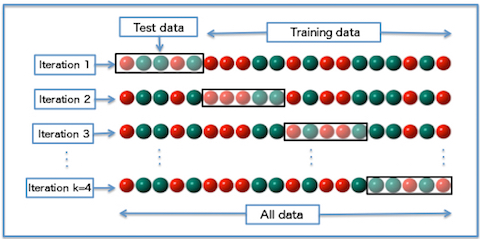

Why is cross-validation important in machine learning?

Let's say you want to train a random forest regressor. One of the hyperparameters you must tune is the maximum depth allowed for each decision tree in your forest.

How can you decide?

That's where cross-validation comes in. Using only your training set, you can use CV to evaluate different hyperparameters and estimate their effectiveness.

This allows you to keep your test set "untainted" and save it for a true hold-out evaluation when you're finally ready to select a model.

For example, you can use CV to tune a random forest model, a linear regression model, and a k-nearest neighbors model, using only the training set. Then, you still have the untainted test set to make your final selection between the model families!

So what is a cross-validation "pipeline?"

The best practice when performing CV is to include your data preprocessing steps inside the cross-validation loop. This prevents accidentally tainting your training folds with influential data from your test fold.

Here's how the CV pipeline looks after including preprocessing steps:

1. Split your data into k equal parts, or "folds" (typically k=10).
2. Preprocess k-1 training folds.
3. Train your model on the same k-1 folds.
4. Preprocess the hold-out fold using the same transformations from step (2).
5. Evaluate your model on the same hold-out fold.
6. Perform steps (2) - (5) k times, each time holding out a different fold.
7. Aggregate the performance across all k folds. This is your performance metric.

Fortunately, Scikit-Learn makes it stupidly simple to set this up:

In [95]:
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': [None, 5, 3, 1],
                         'randomforestregressor__max_features': ['auto', 'sqrt',
                                                                 'log2']})

Yes, it's really that easy. **GridSearchCV** essentially performs cross-validation across the entire "grid" (all possible permutations) of hyperparameters.

It takes in your model (in this case, we're using a model pipeline), the hyperparameters you want to tune, and the number of folds to create.

Now, you can see the best set of parameters found using CV:

In [96]:
clf.best_params_

{'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto'}

Interestingly, it looks like the default parameters win out for this data set.

*Tip*: It turns out that in practice, random forests don't actually require a lot of tuning. They tend to work pretty well out-of-the-box with a reasonable number of trees. Even so, these same steps can be used when building any type of supervised learning model.

## Step 7: Refit on the entire training set.

After you've tuned your hyperparameters appropriately using cross-validation, you can generally get a small performance improvement by refitting the model on the entire training set.

Conveniently, GridSearchCV from sklearn will automatically refit the model with the best set of hyperparameters using the entire training set. This functionality is ON by default.

## Step 8: Evaluate model pipeline on test data.

This step is really straightforward once you understand that the  clf object you used to tune the hyperparameters can also be used directly like a model object.

Here's how to predict a new set of data:

In [97]:
y_pred = clf.predict(X_test)

Now we can use the metrics we imported earlier to evaluate our model performance.

In [98]:
print(f"R2 score is: {r2_score(y_test, y_pred)} and Mean Squared Error is: {mean_squared_error(y_test, y_pred)}")

R2 score is: 0.47512319147648185 and Mean Squared Error is: 0.33868906249999997


There are various ways to improve a model but here are a few quick things to try:

* Try other regression model families (e.g. regularized regression, boosted trees, etc.).
- Collect more data if it's cheap to do so.
* Engineer smarter features after spending more time on exploratory analysis.
* Speak to a domain expert to get more context (...this is a good excuse to go wine tasting!).

As a final note, when you try other families of models, I recommend using the same training and test set as you used to fit the random forest model. That's the best way to get a true apples-to-apples comparison between your models.

## Step 9: Save model for future use.

In [99]:
# save model to a .pkl file
joblib.dump(clf, 'rf_regressor.pkl')

['rf_regressor.pkl']

In [100]:
# load model from .pkl file
clf2 = joblib.load('rf_regressor.pkl')
 
# predict data set using loaded model
clf2.predict(X_test)

array([6.65, 5.81, 4.97, 5.63, 6.5 , 5.74, 4.94, 4.54, 5.  , 5.96, 5.27,
       5.58, 5.79, 5.12, 5.8 , 5.7 , 6.74, 5.72, 5.8 , 6.99, 5.63, 5.62,
       5.01, 5.92, 5.98, 5.03, 5.6 , 5.2 , 5.98, 6.04, 5.93, 6.66, 5.99,
       5.01, 4.94, 5.88, 5.03, 5.75, 5.05, 5.79, 4.9 , 6.  , 6.77, 5.12,
       6.16, 5.37, 5.56, 5.47, 5.06, 6.58, 5.86, 5.2 , 5.87, 5.08, 5.77,
       5.75, 5.25, 5.37, 4.95, 5.19, 5.3 , 5.1 , 5.01, 5.81, 6.01, 5.36,
       6.36, 5.04, 5.1 , 6.69, 5.77, 5.46, 5.05, 5.04, 5.36, 5.96, 5.3 ,
       5.05, 5.29, 5.19, 6.63, 5.48, 6.24, 6.61, 5.13, 5.79, 6.48, 6.13,
       5.55, 5.73, 5.81, 5.34, 6.4 , 5.71, 5.71, 5.76, 6.71, 6.79, 5.47,
       6.85, 5.06, 5.48, 5.09, 6.69, 5.1 , 4.64, 5.69, 5.  , 5.64, 5.99,
       5.77, 5.5 , 6.11, 5.47, 5.05, 5.2 , 5.91, 5.07, 4.9 , 6.06, 5.72,
       5.14, 5.77, 5.97, 5.19, 5.32, 5.34, 5.97, 5.43, 5.44, 5.73, 6.4 ,
       5.16, 5.3 , 5.03, 6.44, 5.02, 5.15, 6.83, 5.39, 5.13, 5.08, 5.79,
       6.14, 5.36, 5.43, 5.08, 6.66, 5.65, 5.14, 5.